# Exp4: 基于K-近邻的车牌号识别

## 一、案例简介

图像的智能处理一直是人工智能领域广受关注的一类技术，代表性的如人脸识别与 CT 肿瘤识别，在人工智能落地的进程中发挥着重要作用。其中车牌号识别作为一个早期应用场景，已经融入日常生活中，为我们提供了诸多便利，在各地的停车场和出入口都能看到它的身影。车牌号识别往往分为字符划分和字符识别两个子任务，本案例我们将关注字符识别的任务，尝试用 K-NN 的方法对分割好的字符图像进行自动识别和转化。

## 二、作业说明

### 基本要求
* 完成数据的读入和表示，将图片表示成向量并和 label 对应上；
* 构建 K-NN 模型（可调库）对测试集中的图片进行预测并计算准确率；
* 分析当 K 取不同值时测试准确率的变化。

### 扩展要求
* 分析不同距离度量方式对模型效果的影响；
* 对比平权和加权 K-NN 的效果；
* 分析训练集大小对测试结果的影响。

## 三、数据概览
本次我们使用已经分割好的车牌图片作为数据集，包括数字 0-9、字母 A-Z（不包含 O 和 I）以及省份简称共 65 个类，编号从 0 到 64。数据已经分成了训练集和测试集，里面的文件夹用 label 编号命名，一个文件夹下的所有图片都属于该文件夹对应的类，每个图片都是 20 * 20 的二值化灰度图。

下面演示一下如何借助 PIL 库将图片转化为向量：

In [11]:
from PIL import Image
img = Image.open('data/train/0/4-3.jpg')  # 打开图片
img  # 显示图片from PIL import Image
img = Image.open('data/train/0/4-3.jpg')  # 打开图片
img  # 显示图片

In [12]:
import numpy as np
pixels = np.array(img)  # 转化为 numpy 矩阵
pixels.shape

(20, 20)

## 四、模型构建
（完成）

In [13]:
# * 完成数据的读入和表示，将图片表示成向量并和 label 对应上；
import os

train_data_path = './data/train'
test_data_path = './data/test'
X_train = []
y_train = []
X_test = []
y_test = []
# train dataset
for sub_dir in os.listdir(train_data_path):
    if sub_dir == '.DS_Store':
        continue
    sub_path = train_data_path + '/' + sub_dir
    for img_file in os.listdir(sub_path):
        img = Image.open(sub_path + '/' + img_file)
        pixels_vector = np.array(img).flatten() # 特征向量
        X_train.append(pixels_vector)
        y_train.append(int(sub_dir))
print('length of X_train =', str(len(X_train)))
print('number of X_train features =', str(len(X_train[0])))
# test dataset
for sub_dir in os.listdir(test_data_path):
    if sub_dir == '.DS_Store':
        continue
    sub_path = test_data_path + '/' + sub_dir
    for img_file in os.listdir(sub_path):
        img = Image.open(sub_path + '/' + img_file)
        pixels_vector = np.array(img).flatten() # 特征向量
        X_test.append(pixels_vector)
        y_test.append(int(sub_dir))
print('length of X_test =', str(len(X_test)))
print('number of X_test features =', str(len(X_test[0])))

length of X_train = 15954
number of X_train features = 400
length of X_test = 4665
number of X_test features = 400


In [14]:
# * 构建 K-NN 模型（可调库）对测试集中的图片进行预测并计算准确率；
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

digits_labels = ['0','1','2','3','4','5','6','7','8','9']
alphabet_labels = ['A','B','C','D','E','F','G','H','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z']
province_labels = ['皖','沪','津','渝','冀','晋','蒙','辽','吉','黑','苏','浙','京','闽','赣','鲁','豫','鄂','湘','粤','桂','琼','川','贵','云','藏','陕','甘','青','宁','新']
label_names = []
alphabet_labels.extend(province_labels)
digits_labels.extend(alphabet_labels)
label_names.extend(digits_labels)

neigh = KNeighborsClassifier(n_neighbors=3)
# 训练集拟合（构建树）
neigh.fit(X_train, y_train)
# 测试集预测
y_test_predict = neigh.predict(X_test)
# 分类结果分析
print(classification_report(y_test, y_test_predict, digits=4, labels=range(len(label_names)), target_names=label_names, zero_division=0.0))
print('准确率 accuracy = {:.4f}'.format(accuracy_score(y_test, y_test_predict)))

              precision    recall  f1-score   support

           0     0.2440    0.8171    0.3758       175
           1     0.6483    1.0000    0.7866        94
           2     0.6944    1.0000    0.8197        75
           3     0.9506    0.9506    0.9506        81
           4     0.7083    0.9067    0.7953       150
           5     0.6281    0.9744    0.7638        78
           6     0.9451    1.0000    0.9718        86
           7     0.7156    0.9873    0.8298        79
           8     0.4408    0.9781    0.6077       137
           9     0.8973    0.9924    0.9424       132
           A     0.9871    0.8767    0.9287       438
           B     0.9516    0.1405    0.2448       420
           C     0.7455    1.0000    0.8542       246
           D     0.3333    0.0267    0.0494       150
           E     0.9149    0.4343    0.5890       198
           F     0.4898    1.0000    0.6575       120
           G     0.8596    0.4537    0.5939       108
           H     0.4016    

#### 测试集预测准确率
准确率 accuracy = 0.6999

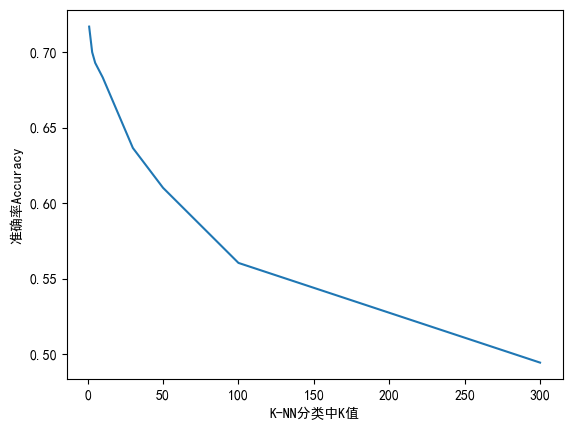

In [15]:
# * 分析当 K 取不同值时测试准确率的变化。
import matplotlib.pyplot as plt

K = [1, 3, 5, 10, 30, 50, 100, 300]
accuracy_arr = []
for _k in K:
    neigh = KNeighborsClassifier(n_neighbors=_k)
    neigh.fit(X_train, y_train)
    y_test_predict = neigh.predict(X_test)
    accuracy_arr.append(accuracy_score(y_test, y_test_predict))

plt.figure()
plt.plot(K, accuracy_arr)
plt.xlabel('K-NN分类中K值')
plt.ylabel('准确率Accuracy')
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.show()

#### 准确率随K值变化
当K增大时，准确率呈降低趋势

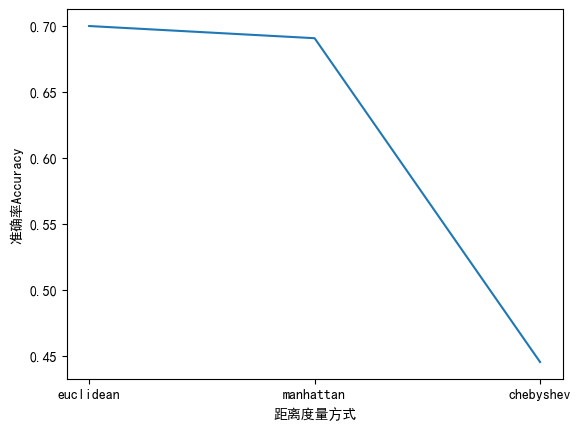

In [16]:
# * 分析不同距离度量方式对模型效果的影响；
METRICS = ["euclidean", "manhattan", "chebyshev"]

accuracy_arr = []
for metric in METRICS:
    neigh = KNeighborsClassifier(n_neighbors=3, metric=metric)
    neigh.fit(X_train, y_train)
    y_test_predict = neigh.predict(X_test)
    accuracy_arr.append(accuracy_score(y_test, y_test_predict))

plt.figure()
plt.plot(METRICS, accuracy_arr)
plt.xlabel('距离度量方式')
plt.ylabel('准确率Accuracy')
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.show()

#### 不同距离度量方式对模型效果的影响
以上展示 3-NN下，不同距离度量方式（欧式、曼哈顿、切比雪夫）得到的准确率，以欧氏距离准确率最高

In [17]:
# * 对比平权和加权 K-NN 的效果；
neigh = KNeighborsClassifier(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)
y_test_predict = neigh.predict(X_test)
print("3-NN下，使用平权得到准确率 Accuracy={:.4f}".format(accuracy_score(y_test, y_test_predict)))

neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X_train, y_train)
y_test_predict = neigh.predict(X_test)
print("3-NN下，使用距离加权得到准确率 Accuracy={:.4f}".format(accuracy_score(y_test, y_test_predict)))

3-NN下，使用平权得到准确率 Accuracy=0.6999
3-NN下，使用距离加权得到准确率 Accuracy=0.7104


#### 对比平权和加权 K-NN 的效果
在 3-NN下，距离加权的准确率高于平权准确率

3-NN且训练集为原始数据集的0.10时，得到准确率 Accuracy=0.5878
3-NN且训练集为原始数据集的0.30时，得到准确率 Accuracy=0.6647
3-NN且训练集为原始数据集的0.50时，得到准确率 Accuracy=0.6836
3-NN且训练集为原始数据集的0.70时，得到准确率 Accuracy=0.6907


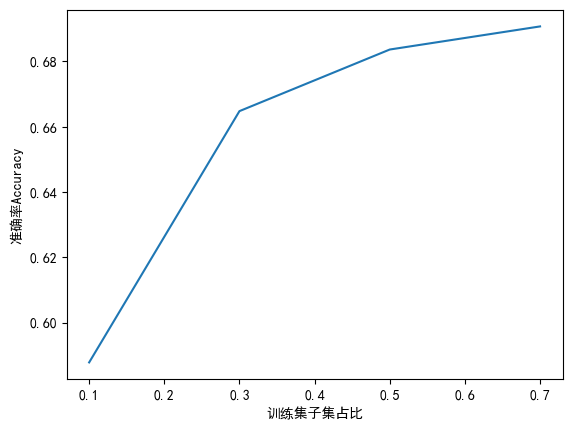

In [18]:
# * 分析训练集大小对测试结果的影响。
import numpy as np
train_set_ratio = [.1, .3, .5, .7]
accuracy_arr = []
np_y_train = np.array(y_train)
for ratio in train_set_ratio:
    selected_idx = []
    for i in range(len(label_names)):
        idx = np.where(np_y_train==i)
        i_idx = idx[0]
        selected_i_idx = i_idx[:int(len(i_idx) * ratio)]
        selected_idx.extend(selected_i_idx)

    selected_X_train = [ X_train[i] for i in selected_idx ]
    selected_y_train = [ y_train[i] for i in selected_idx ]
    neigh = KNeighborsClassifier(n_neighbors=3)
    # 在训练集子集上拟合
    neigh.fit(selected_X_train, selected_y_train)
    y_test_predict = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_predict)
    accuracy_arr.append(accuracy)
    print("3-NN且训练集为原始数据集的{:.2f}时，得到准确率 Accuracy={:.4f}".format(ratio, accuracy))

plt.figure()
plt.plot(train_set_ratio, accuracy_arr)
plt.xlabel('训练集子集占比')
plt.ylabel('准确率Accuracy')
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.show()

#### 分析训练集大小对测试结果的影响
以上展示准确率随使用的训练集子集变化趋势，成正相关